<a href="https://colab.research.google.com/github/HknyYtbz/cng-562/blob/master/YATBAZ_forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [0]:
#Essential imports for the project
import numpy as np
import pandas as pd

Please upload your Kaggle API JSON named as kaggle.json to download the data


In [0]:
from google.colab import files
#Kaggle api key upload
files.upload()
#Essential downloads for the project, especially the kaggle dataset download
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json 
!kaggle datasets download -d elikplim/forest-fires-data-set
!ls

Saving kaggle.json to kaggle.json
  0% 0.00/7.10k [00:00<?, ?B/s]
100% 7.10k/7.10k [00:00<00:00, 6.75MB/s]
forest-fires-data-set.zip  kaggle.json	sample_data


#

# Helper Functions

I have 4 helper function that I wrote in my first iteration.

1.   **categorical_to_dumy**: It has the same effect as the pandas get dummies function except removing one of the columns to avoid dummy trap. I updated my implementation with get dummies yet left this function to improve for my needs later on

2.   **categorical_to_numeric**: I puts values to categorical variables between 0 - number of unique elements to make them numerrical

3. **mapping**: This function is written to apply categorical to numberic function at one run to the dataset with apply function

4. **makeInt**: This is a mapping function from Boolean to Integer, again it is implemented to be used with apply function to the DataFrame



In [0]:
mapping_table = None
#Helper Functions for Preprocessing and Analysis (Not all used)
def makeInt(x):
  return 1 if x==True else 0
def categorical_to_dumy(st,df):
  for elem in df[st].unique():
    df[str(elem)] = df[st] == elem
    df[str(elem)] = df[str(elem)].apply(makeInt)
  df = df.drop(st, axis=1)
  return df

def mapping(x):
  global mapping_table
  return mapping_table[x]
  
def categorical_to_numeric(st,df): #quite inefficient way
  global mapping_table
  mapping_table = dict(zip(df[st].unique(), range(1,len(df[st].unique())+1)))
  return df[st].apply(mapping)
#df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income'], drop_first=True)

    

# Preprocessing

In [0]:
df = pd.read_csv('/content/forest-fires-data-set.zip', compression='zip', header=0, sep=',', quotechar='"')
df_v2 = df
df["area"].max()

1090.84

As a preprocessing, I first checked some properties to understand the data better. The flow is as follows:

1.   Get general information about each variable, their min, max, mean values etc.
2.   Get the percentage of NA values for each column to decide on a strategy for handling missing data. In this dataset, there were no NA values. However, the code given is  handling the  both continous variables and discerete variables  by putting mean (if continous) and mode (if discrete) value to the NA values.
3. After handling missing data, the continous variables are normalized with a minmax scaler to make them between zero and one, so that it will be more accurate to use them in the models.
4. Lastly, the categorical variables are converted into numeric values between 0 to number of unique elements in that variable. Pandas get_dummies dunction could be used as well to have a better representation of the data for machine learning models




In [0]:
dimension = df.shape
"""
#Column Information Retrieval
for j in range(dimension[1]):
  print(df[df.columns[j]].describe())
  print("--------------------")
#NA Value Information Retrieval
print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df.columns[j],(df.iloc[:,j].isnull().values.ravel().sum()/len(df.iloc[:,j].values)*100.0)))
"""
#Missing value handling and check
for j in df.columns:
  if df[j].dtype.name=='object':
    df[j].fillna(df[j].mode()[0],inplace=True)
  else:
    df[j].fillna(df[j].mean(),inplace=True)


print("----Number of NA's-------")
for j in range(dimension[1]):
     #print(df.columns[j],df.iloc[:,j].isnull().values.ravel().sum())
     print("%s:%.2f%%"%(df.columns[j],(df.iloc[:,j].isnull().values.ravel().sum()/len(df.iloc[:,j].values)*100.0)))

from sklearn.preprocessing import minmax_scale
for i in df.columns:
  if df[i].dtype.name != 'object':
    # Fit your data on the scaler object
    if(i != "area"):
      df[i] = pd.DataFrame(minmax_scale(df[i]))
#Convert categorical values to numeric
"""
#My code for dummies I used pandas version
for i in df.columns:
  if df[i].dtype.name == 'object':
    if i != "income":
      df = categorical_to_dumy(i,df)
    else:
      df[i] = categorical_to_numeric(i,df)
df.head()
"""
for i in df.columns:
  if df[i].dtype.name == 'object':
    df[i] = categorical_to_numeric(i,df)
  

----Number of NA's-------
X:0.00%
Y:0.00%
month:0.00%
day:0.00%
FFMC:0.00%
DMC:0.00%
DC:0.00%
ISI:0.00%
temp:0.00%
RH:0.00%
wind:0.00%
rain:0.00%
area:0.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


After completing the preprocessing state, I seperated my independent and dependet variable(s) x and y and to have a understanding about the area variable I described and plot area column.

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

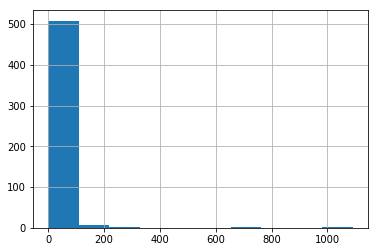

In [0]:
#df[df["area"]>0] =1
y = df["area"]
x = df.drop("area", axis=1)
print(y.describe())
y.hist()
y.head()

 hen, I have converted the dependent variable by assuming that zero value in the area column means "No Fire" and non-zero value means "Fire". 

In [0]:
#I have labeled the rows with fire and no-fire
updated_y = np.asarray([1 if y.iloc[i] > 0  else 0 for i in range(y.shape[0])])
#updated_y = y
#print(len(updated_y))
#print(y.shape)

# Model Selection

After making sure that data is ready, I implemented different models with grid search first and used the best parameters to see their accuracy score. the accuracy metric could have been selected differently. In my initial implementation, I have also used F1 score.

## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, updated_y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier()

gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
gd_sr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print("Neighbors: %d\tScore: %.2f"%(gd_sr.best_params_['n_neighbors'],gd_sr.best_score_))

Neighbors: 1	Score: 0.59


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
#print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.471


## SVM

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x, updated_y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'poly', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}	 Best Score: 0.57


In [0]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
classifier = SVC(C= 0.001, gamma= 1, kernel= 'poly')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 1.000


## Logistic Regression


**I made solver 'liblinear' because it is default and when I omit that, it gives many warnings in the output**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, updated_y, test_size=0.2, random_state=1)
classifier = LogisticRegression(solver='liblinear')
param_grid ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 0.001, 'penalty': 'l2'}	 Best Score: 1.00


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=0.001,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 1.000


## Decision Tree

In [0]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid =  [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, updated_y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3, 'min_samples_leaf': 5}

In [0]:
print("The best parameters %s with best score %.5f"%(grid_search.best_params_,grid_search.best_score_))

The best parameters {'max_depth': 3, 'min_samples_leaf': 5} with best score 0.60533


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 5)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.538


# Feature Selection

I tried 3 different methods to eliminate features just to see their effect.

## Feature Importance

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


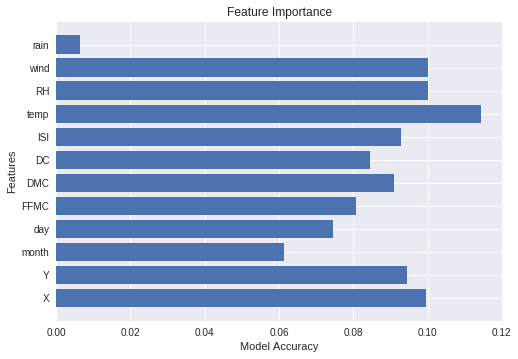

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x, updated_y)
values = model.feature_importances_
#print(x.shape)

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, values, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, x.columns)
plt.grid(True)

Selected the columns with higher importance values. 

In [0]:
x1 = x[["X","temp","wind","RH"]]

## Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(x, updated_y)
selected = [x.columns[i]  for i in range(len(fit.support_)) if fit.support_[i]]
x2= x[selected]

## Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
x3 = pd.DataFrame(data = principalComponents)

# Model Selection with New Features

Again I used all the models that I used in the previous section, with the different independent variables.

## KNN

### X Version 1

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, updated_y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
grid_search.fit(x_train, y_train)
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'n_neighbors': 27}	 Best Score: 0.58


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.529


### X Version 2

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, updated_y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
grid_search.fit(x_train, y_train)
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'n_neighbors': 17}	 Best Score: 0.59


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.471


### X Version 3

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, updated_y, test_size=0.2, random_state=1)
param_grid = {'n_neighbors': list(range(1,28)) }#list(range(10,35))}
#Initial Try with desicion trees
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=classifier,  
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10)
grid_search.fit(x_train, y_train)
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'n_neighbors': 1}	 Best Score: 0.58


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy: %.3f"%accuracy_score(y_test,y_pred))

Accuracy: 0.490


## SVM

### X Version 1

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x1, updated_y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'poly', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}	 Best Score: 0.57


In [0]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
classifier = SVC(C= 10, gamma= 0.001, kernel= 'linear')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.442


### X Version 2

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x2, updated_y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'poly', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}	 Best Score: 0.59


In [0]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
classifier = SVC(C= 10, gamma= 1, kernel= 'rbf')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.558


### X Version 3

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
classifier = SVC()
x_train, x_test, y_train, y_test = train_test_split(x3, updated_y, test_size=0.2, random_state=1)
param_grid = {'kernel':['linear', 'poly', 'rbf'],'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}	 Best Score: 0.57


In [0]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
classifier = SVC(C= 0.1, gamma= 1, kernel= 'poly')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.567


## Logistic Regression

### X Version 1

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, updated_y, test_size=0.2, random_state=1)
classifier = LogisticRegression(solver='liblinear')
param_grid ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 10.0, 'penalty': 'l2'}	 Best Score: 0.55


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=10,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.538


### X Version 2

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, updated_y, test_size=0.2, random_state=1)
classifier = LogisticRegression(solver='liblinear')
param_grid ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 100.0, 'penalty': 'l1'}	 Best Score: 0.57


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=100,penalty='l1')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.567


### X Version 3

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, updated_y, test_size=0.2, random_state=1)
classifier = LogisticRegression(solver='liblinear')
param_grid ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid_search = GridSearchCV(classifier, param_grid, cv=10)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print("Parameters: %s\t Best Score: %.2f"%(grid_search.best_params_,grid_search.best_score_))

Parameters: {'C': 10.0, 'penalty': 'l2'}	 Best Score: 0.55


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=10,penalty='l2')
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.500


## Decision Tree

In [0]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid =  [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

### X Version 1

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, updated_y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3, 'min_samples_leaf': 5}

In [0]:
print("The best parameters %s with best score %.5f"%(grid_search.best_params_,grid_search.best_score_))

The best parameters {'max_depth': 3, 'min_samples_leaf': 5} with best score 0.61501


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 5)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.538


### X Version 2

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, updated_y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 13, 'min_samples_leaf': 1}

In [0]:
print("The best parameters %s with best score %.5f"%(grid_search.best_params_,grid_search.best_score_))

The best parameters {'max_depth': 13, 'min_samples_leaf': 1} with best score 0.60291


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(max_depth= 13, min_samples_leaf= 1)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.471


### X Version 3

In [0]:
from sklearn.model_selection import GridSearchCV  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, updated_y, test_size=0.2, random_state=1)
classifier=DecisionTreeClassifier()
grid_search=GridSearchCV(classifier,param_grid,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 13, 'min_samples_leaf': 10}

In [0]:
print("The best parameters %s with best score %.5f"%(grid_search.best_params_,grid_search.best_score_))

The best parameters {'max_depth': 13, 'min_samples_leaf': 10} with best score 0.64165


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(max_depth= 13, min_samples_leaf= 10)
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
print("Accuracy Score: %.3f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.519


# Conclusion


In this dataset, due to the limited number of observations, getting an high accuracy was  a hard job to do. I tried to use the features with highest importance or tried to reduce the dimension with PCA or eliminate the features that are not that have high effect. In addition, even though this dataset can be used both for classification and regression, I decided to focus on classification task. To do so, I have converted the area burned column to a binary variable where 1 determines there is a fire and 0 determines there is none.

I used SVM, Decision Tree, Logistic Regression and KNN and used both grid search and based on the results of grid search I train the model and calculate the "Accuracy" with the test data where the ration for train-test is 80-20 percent. After this processes, I selected the  Logistic Regression model with parameter C=100 and penalty is L1 (Lasso Regression).

As a future work, I had 2 main ideas that I couldn't try for this time due to the time I spent for the first dataset.

1)  Instead of using month column as a variable, I planned to generate season column. Even though  I did not explore the distributions of the fires based on the months, I believe that there should be a seasonal change for the forest fires. Hence, to explore data in that direction and making the conversion if necessary was my first idea

2) Similarly, instead of having days in the data, distributions between weekends and weekdays might be examined as the human factor for a forest fire is increasing in the weekends due to the social activities take place in the forests (picnics etc.). This was a collobarative idea that I talk with my friends taking the course.

All in all, in this dataset, I have learned that the importance of the exploration of the dataset to extract features, i.e. meaningful features that can represent data properly in the learning models. In addition, the importance of the data for learning is emphasized for me as the dataset has limited observations.